In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from numpy import random

In [3]:
from obs import h_operator
op = "cubic"
sigma = 1.0

In [69]:
nmem = 20
nx = 40
#xf = random.normal(0, scale=sigma, size=nx*nmem).reshape(nx, nmem)
xf = random.rand(nx*nmem).reshape(nx, nmem)
xf = (xf - np.mean(xf))*sigma

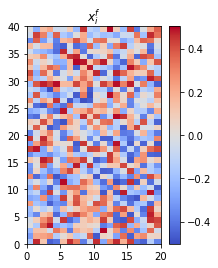

In [70]:
cmap = "coolwarm"
x = np.arange(nx+1)
y = np.arange(nmem+1)
vlim = max(np.max(xf), abs(np.min(xf)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, xf, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$x^f_i$")
plt.rc('text', usetex=False)
plt.show()

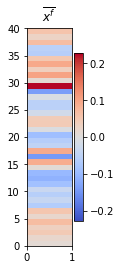

In [71]:
xf_ = np.mean(xf, axis=1)[:, None]
y_ = np.arange(1+1)
vlim = max(np.max(xf_), abs(np.min(xf_)))
plt.figure(figsize=(1, 4))
mappable = plt.pcolor(y_, x, xf_, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$\overline{x^f}$")
plt.rc('text', usetex=False)
plt.show()

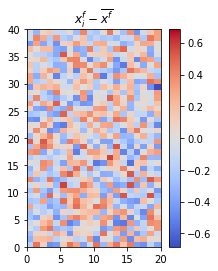

In [72]:
dxf = xf - xf_
vlim = max(np.max(dxf), abs(np.min(dxf)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dxf, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$x^f_i-\overline{x^f}$")
plt.rc('text', usetex=False)
plt.show()

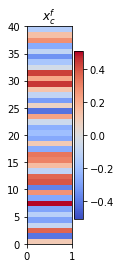

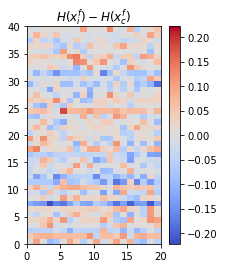

In [76]:
#xfc = random.normal(0, scale=sigma, size=nx)[:, None]
xfc = random.rand(nx)[:, None]
xfc = (xfc - np.mean(xfc))*sigma
vlim = max(np.max(xfc), abs(np.min(xfc)))
plt.figure(figsize=(1, 4))
mappable = plt.pcolor(y_, x, xfc, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$x^f_c$")
plt.rc('text', usetex=False)
plt.show()
dyc = h_operator(xf, operator=op) - h_operator(xfc, operator=op)
vlim = max(np.max(dyc), abs(np.min(dyc)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dyc, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$H(x^f_i)-H(x^f_c)$")
plt.rc('text', usetex=False)
plt.show()

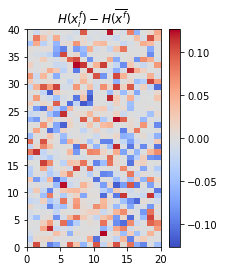

In [77]:
dy = h_operator(xf, operator=op) - h_operator(xf_, operator=op)
vlim = max(np.max(dy), abs(np.min(dy)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dy, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$H(x^f_i)-H(\overline{x^f})$")
plt.rc('text', usetex=False)
plt.show()

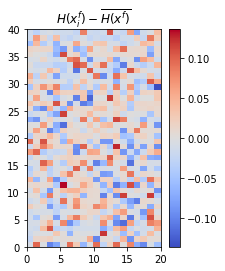

In [78]:
dyb = h_operator(xf, operator=op) - np.mean(h_operator(xf, operator=op), axis=1)[:, None]
vlim = max(np.max(dyb), abs(np.min(dyb)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dyb, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$H(x^f_i)-\overline{H(x^f)}$")
plt.rc('text', usetex=False)
plt.show()

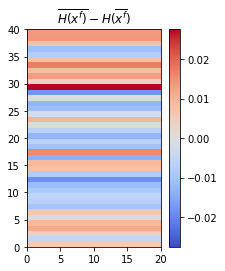

In [79]:
dif = dy - dyb
vlim = max(np.max(dif), abs(np.min(dif)))
plt.figure(figsize=(3, 4))
mappable = plt.pcolor(y, x, dif, cmap=cmap, norm=Normalize(vmin=-vlim, vmax=vlim))
plt.colorbar(mappable)
plt.rc('text', usetex=True)
plt.title(r"$\overline{H(x^f)}-H(\overline{x^f})$")
plt.rc('text', usetex=False)
plt.show()

In [88]:
import scipy.optimize as spo
from scipy.optimize import rosen, rosen_der
x0 = random.rand(10)
res = spo.minimize(rosen, x0, method='L-BFGS-B', jac=rosen_der, options={'disp':0})

In [90]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [94]:
res.x

array([0.99999983, 0.99999986, 1.00000023, 1.00000025, 1.00000009,
       1.0000001 , 1.00000014, 0.99999984, 0.99999958, 0.99999918])

In [101]:
from mlef import calc_j as mlef_calcj
from mlef import calc_grad_j as mlef_calcg
from mlef import precondition

In [141]:
nx = 81
nmem = 4
xc = random.normal(0, scale=1.0, size=nx)
y = random.normal(1.0, scale=0.5, size=nx)
pf = random.normal(0, scale=1.0, size=nx*nmem).reshape(nx,nmem)
htype = {"operator":"cubic", "perturbation":"mlef", "gamma":1}
rmat = np.eye(nx)*1.0
rinv = rmat @ rmat.T
dh = h_operator(xc[:, None]+pf, htype["operator"], htype["gamma"]) - h_operator(xc, htype["operator"], htype["gamma"])[:, None]
zmat = rmat @ dh
tmat, heinv, condh = precondition(zmat)
gmat = pf @ tmat
x0 = random.rand(nmem)*0.0
args_j = (xc, pf, y, tmat, gmat, heinv, rinv, htype)
print(mlef_calcj(x0, *args_j))
mlef_calcg(x0, *args_j)

eigenvalues=[2729.32246714 4836.17482391 7681.63398515 8998.83274764]
cond(hessian)=3.2962526792926523
488.5898061862267


array([-157.94348989,  210.88545583, 1095.8103816 ,  910.23273651])

In [142]:
spo.check_grad(mlef_calcj, mlef_calcg, x0, *args_j)

1442.02613392608

In [134]:
from mlefb import calc_j as mlefb_calcj
from mlefb import calc_grad_j as mlefb_calcg
from mlefb import precondition as preconditionb

In [143]:
eps = 1e-6
htype = {"operator":"cubic", "perturbation":"mlefb", "gamma":1}
args_b = (xc, pf, y, preconditionb, eps, rmat, htype)
print(mlefb_calcj(x0, *args_b))
mlefb_calcg(x0, *args_b)

488.58972347487025


array([-640.0187628 , -248.67237122,  638.85797912,  249.83315503])

In [144]:
spo.check_grad(mlefb_calcj, mlefb_calcg, x0, *args_b)

165.42316061594917

## Nonlinear observation operators

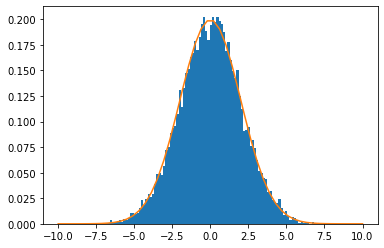

In [8]:
sigma = 2.0
r = random.normal(0.0, scale=sigma, size=10000)
x = np.linspace(-100,100)
x = x * 0.1
y = np.exp(-(x/sigma)**2/2)/np.sqrt(2*np.pi)/sigma
plt.hist(r, bins=100, density=True)
plt.plot(x, y)
plt.show()

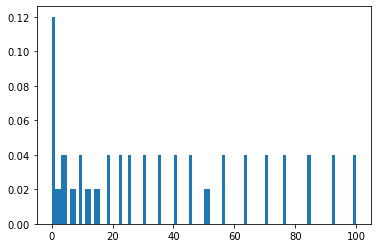

In [9]:
from obs import h_operator
op = "quadratic"
r2 = h_operator(x, op, sigma)
plt.hist(r2, bins=100, density=True)
plt.show()

## Lorenc(2003), Bowler et al.(2013)の再現

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from numpy import random

(1000, 2)


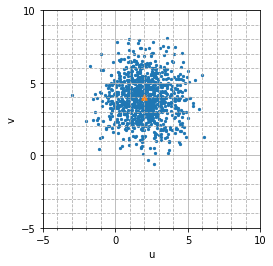

In [2]:
wmean = np.array([2.0,4.0])
wstdv = np.array([2.0,2.0])
wind = random.multivariate_normal(wmean, np.diag(wstdv), size=1000)
print(wind.shape)
x = np.arange(-5,11)
fig, ax = plt.subplots()
ax.scatter(wind[:,0], wind[:,1], s=5)
ax.scatter(wmean[0], wmean[1], s=30, marker='^')
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.set_aspect("equal")
ax.set_xticks(x[::5])
ax.set_yticks(x[::5])
ax.set_xticks(x, minor=True)
ax.set_yticks(x, minor=True)
ax.grid(which="major")
ax.grid(which="minor", linestyle="dashed")
plt.show()

In [6]:
xf = wind.transpose()
xf_ = np.mean(xf, axis=1)
y = np.array([3.0]) #observation [m/s]
sig = 0.3 #observation error [m/s]
dx = 1.0
binv = np.diag(1.0/wstdv)
rmat = np.array([1.0 / sig]).reshape(-1,1)
rinv = np.array([1.0 / sig / sig]).reshape(-1,1)

In [11]:
theta = np.linspace(0.0, 2.0*np.pi, 360)
rmin = y - sig
rmax = y + sig
xmin = rmin*np.cos(theta)
ymin = rmin*np.sin(theta)
xmax = rmax*np.cos(theta)
ymax = rmax*np.sin(theta)
#fig, ax = plt.subplots()
#ax.plot(xmin, ymin)
#ax.plot(xmax, ymax)
#ax.set_aspect("equal")
#plt.show()

In [3]:
from enkf import analysis
htype = {"operator":"speed","perturbation":"etkf","gamma":1}

In [5]:
import obs
print(xf.shape)
yobs = obs.h_operator(xf, htype["operator"], htype["gamma"])
print(yobs.shape)
yobs_ = obs.h_operator(xf_, htype["operator"], htype["gamma"])
print(yobs_.shape)
jh = obs.dhdx(xf_, htype["operator"], htype["gamma"])
print(jh.shape)

(2, 1000)
(1, 1000)
(1,)
(1, 2)


In [6]:
xa, xa_, pa, chi2, ds, condh = analysis(xf, xf_, y, sig, dx, htype, tlm=False)

save_dh=False cycle0
eigenvalue(sqrt)=[ 31.60696126  31.60696126  31.60696126  31.60696126  31.60696126
  31.60696126  31.60696126  31.60696126  31.60696126  31.60696126
  31.60696126  31.60696126  31.60696126  31.60696126  31.60696126
  31.60696126  31.60696126  31.60696126  31.60696126  31.60696126
  31.60696126  31.60696126  31.60696126  31.60696126  31.60696126
  31.60696126  31.60696126  31.60696126  31.60696126  31.60696126
  31.60696126  31.60696126  31.60696126  31.60696126  31.60696126
  31.60696126  31.60696126  31.60696126  31.60696126  31.60696126
  31.60696126  31.60696126  31.60696126  31.60696126  31.60696126
  31.60696126  31.60696126  31.60696126  31.60696126  31.60696126
  31.60696126  31.60696126  31.60696126  31.60696126  31.60696126
  31.60696126  31.60696126  31.60696126  31.60696126  31.60696126
  31.60696126  31.60696126  31.60696126  31.60696126  31.60696126
  31.60696126  31.60696126  31.60696126  31.60696126  31.60696126
  31.60696126  31.60696126  31.6069612

0.0010009523751471285


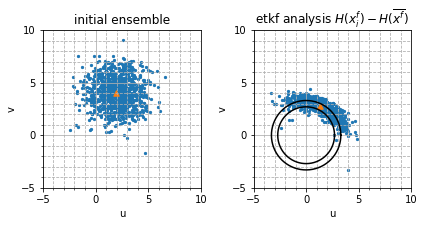

In [8]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xa_[0], xa_[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"etkf analysis $H(x^f_i)-H(\overline{x^f})$")
#ax[1].set_title(r"etkf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("etkf-fh2_speed.png")
plt.show()

In [8]:
from mlef import analysis as analysis_mlef
htype = {"operator":"speed","perturbation":"mlef","gamma":1}

In [13]:
xc, pa, chi2, ds, condh = analysis_mlef(xf, xf_, y, rmat, rinv, htype)
xa = xc[:, None] + pa

save_dh=False
eigenvalues=[-1.03343991e-11 -9.26069103e-12 -5.77585723e-12 -4.82012575e-12
 -4.47963681e-12 -3.46923566e-12 -3.41453898e-12 -2.20798313e-12
 -1.85621331e-12 -1.72314969e-12 -1.48081882e-12 -1.02481280e-12
 -8.92555013e-13 -7.59368555e-13 -3.24383970e-13 -3.11989984e-13
 -2.95006920e-13 -2.92087435e-13 -2.89291462e-13 -2.69521772e-13
 -2.68780291e-13 -2.59678542e-13 -2.55012866e-13 -2.54438422e-13
 -2.42015143e-13 -2.37344036e-13 -2.24748219e-13 -2.23774755e-13
 -2.19142013e-13 -2.15862374e-13 -2.12326767e-13 -2.11530244e-13
 -2.08520211e-13 -2.03206434e-13 -2.01801267e-13 -1.90777222e-13
 -1.90158018e-13 -1.87659398e-13 -1.86533498e-13 -1.84649964e-13
 -1.83728288e-13 -1.78330059e-13 -1.78239641e-13 -1.74799058e-13
 -1.73259745e-13 -1.72582867e-13 -1.68294302e-13 -1.66542423e-13
 -1.65492005e-13 -1.62449239e-13 -1.62192641e-13 -1.55348702e-13
 -1.53408447e-13 -1.52041438e-13 -1.50649193e-13 -1.48210163e-13
 -1.45130326e-13 -1.44718224e-13 -1.43730156e-13 -1.43534705e-13

cond(hessian)=20585.77734461882
save_hist=False cycle100
check_grad=777.8300938415426
success=False message=Desired error not necessarily achieved due to precision loss.
J=9.204e+00 dJ=6.142e+02 nit=1
x=[-0.1103105  -0.27454949]
eigenvalues=[-1.17440713e-11 -9.13611417e-12 -8.10823006e-12 -6.34355288e-12
 -4.50167213e-12 -3.34962745e-12 -2.96197471e-12 -2.68386610e-12
 -2.54786953e-12 -2.16039176e-12 -1.07296100e-12 -9.07866203e-13
 -7.84639343e-13 -3.03115659e-13 -3.00128712e-13 -2.82867988e-13
 -2.67791797e-13 -2.67282961e-13 -2.59900673e-13 -2.55304300e-13
 -2.46463746e-13 -2.44602643e-13 -2.43882460e-13 -2.43718853e-13
 -2.34821641e-13 -2.28565935e-13 -2.18624838e-13 -2.16963822e-13
 -2.15809539e-13 -2.08186782e-13 -2.04164119e-13 -2.01794340e-13
 -1.98536787e-13 -1.93168929e-13 -1.90517230e-13 -1.86686803e-13
 -1.84662424e-13 -1.82052388e-13 -1.80973698e-13 -1.80744573e-13
 -1.80078592e-13 -1.73276888e-13 -1.73081235e-13 -1.66650360e-13
 -1.65677264e-13 -1.64504758e-13 -1.64102405

cond(hessian)=20494.023954745655
0.999951205287833


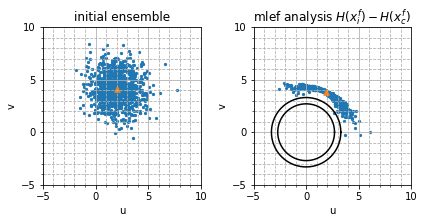

In [14]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xc[0], xc[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"mlef analysis $H(x^f_i)-H(x^f_c)$")
#ax[1].set_title(r"etkf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("mlef_speed.png")
plt.show()

In [15]:
from mlefb import analysis as analysis_mlefb
htype = {"operator":"speed","perturbation":"mlefb","gamma":1}

In [16]:
xa, xa_, pa, chi2, da, condh = analysis_mlefb(xf, xf_, y, rmat, rinv, htype)

save_dh=False
eigenvalues=[-1.41917405e-14 -1.10683376e-14 -9.63024966e-15 -6.67927307e-15
 -4.23559830e-15 -2.88168306e-15 -1.95247086e-15 -1.27004389e-15
 -1.15071575e-15 -8.87488914e-16 -7.49673780e-16 -6.53479770e-16
 -3.80276894e-16 -3.49829002e-16 -3.19526869e-16 -3.12082857e-16
 -2.94686707e-16 -2.71798519e-16 -2.70273948e-16 -2.67326546e-16
 -2.60610929e-16 -2.56172131e-16 -2.52770885e-16 -2.44026516e-16
 -2.41507899e-16 -2.41351574e-16 -2.40161647e-16 -2.30994638e-16
 -2.29560439e-16 -2.18415190e-16 -2.18288948e-16 -2.14183663e-16
 -2.06801584e-16 -2.02071836e-16 -2.00564142e-16 -2.00397348e-16
 -1.98897917e-16 -1.95283596e-16 -1.93367529e-16 -1.92030115e-16
 -1.91955422e-16 -1.84142890e-16 -1.83889266e-16 -1.79526655e-16
 -1.74297895e-16 -1.71270694e-16 -1.70451158e-16 -1.70008995e-16
 -1.69560152e-16 -1.66382629e-16 -1.65760270e-16 -1.64331070e-16
 -1.63054290e-16 -1.62483965e-16 -1.59704185e-16 -1.53486978e-16
 -1.53025848e-16 -1.50998365e-16 -1.50829705e-16 -1.49417647e-16

cond(hessian)=21.995638102629577
save_hist=False cycle100
check_grad=2.8042254327735294e-05
success=True message=Optimization terminated successfully.
J=6.341e-01 dJ=1.294e-06 nit=7
x=[-0.57489718 -1.40129037]
eigenvalues=[-1.54640976e-14 -1.39444140e-14 -1.11541787e-14 -7.05625383e-15
 -4.52781765e-15 -1.92135713e-15 -1.19817062e-15 -7.95154664e-16
 -6.61403052e-16 -5.91108763e-16 -5.20262279e-16 -4.30593139e-16
 -4.29002907e-16 -3.82292017e-16 -3.52330287e-16 -3.25950615e-16
 -2.92284763e-16 -2.91475848e-16 -2.84324880e-16 -2.66945795e-16
 -2.65250214e-16 -2.61933446e-16 -2.50524405e-16 -2.40403810e-16
 -2.39511607e-16 -2.35457842e-16 -2.28047281e-16 -2.23573098e-16
 -2.22787148e-16 -2.16880730e-16 -2.09785497e-16 -2.06501135e-16
 -2.00853069e-16 -1.99623606e-16 -1.99587276e-16 -1.97669502e-16
 -1.94993374e-16 -1.89115157e-16 -1.83934708e-16 -1.81538998e-16
 -1.80710631e-16 -1.80355876e-16 -1.74908616e-16 -1.70236033e-16
 -1.67787225e-16 -1.67591296e-16 -1.65562327e-16 -1.57457626e-1

cond(hessian)=21.867460787704122
0.9542699534386591


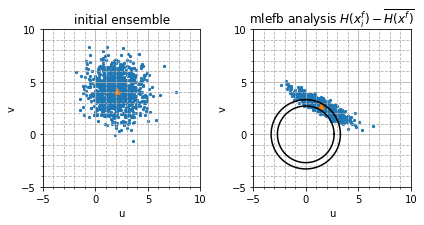

In [17]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xa_[0], xa_[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"mlefb analysis $H(x^f_i)-\overline{H(x^f)}$")
#ax[1].set_title(r"etkf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("mlefb_speed.png")
plt.show()

In [18]:
from mleft import analysis as analysis_mleft
htype = {"operator":"speed","perturbation":"mleft","gamma":1}

In [19]:
xa, xa_, pa, chi2, da, condh = analysis_mleft(xf, xf_, y, rmat, rinv, htype)

save_dh=False
save_hist=False cycle100
check_grad=5.762920131630342
success=False message=Desired error not necessarily achieved due to precision loss.
J=1.630e+00 dJ=8.428e-01 nit=4
x=[-0.85489232 -1.69120359]
0.9999999999999546


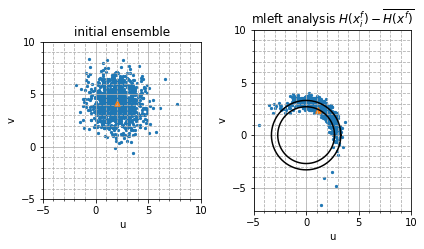

In [21]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xa_[0], xa_[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"mleft analysis $H(x^f_i)-\overline{H(x^f)}$")
#ax[1].set_title(r"etkf analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("mleft_speed.png")
plt.show()

In [4]:
from var import analysis as analysis_var
htype = {"operator":"speed","perturbation":"var","gamma":1}

In [9]:
xa = np.zeros_like(xf)
nmem = xf.shape[1]
for i in range(nmem):
    xa[:,i], chi2 = analysis_var(xf[:,i], binv, y, rinv, htype)
xa_ = np.mean(xa, axis=1)

success=True message=Optimization terminated successfully.
J=9.967e-01 dJ=4.454e-15 nit=2
success=True message=Optimization terminated successfully.
J=2.089e-01 dJ=5.389e-16 nit=2
success=True message=Optimization terminated successfully.
J=2.068e+00 dJ=7.123e-15 nit=2
success=True message=Optimization terminated successfully.
J=2.877e+00 dJ=6.894e-15 nit=2
success=True message=Optimization terminated successfully.
J=1.891e+00 dJ=1.425e-14 nit=2
success=True message=Optimization terminated successfully.
J=3.096e+00 dJ=5.307e-15 nit=2
success=True message=Optimization terminated successfully.
J=4.383e-01 dJ=2.395e-15 nit=2
success=True message=Optimization terminated successfully.
J=2.937e+00 dJ=5.841e-15 nit=2
success=True message=Optimization terminated successfully.
J=1.495e+00 dJ=8.899e-15 nit=2
success=True message=Optimization terminated successfully.
J=2.184e-01 dJ=1.171e-15 nit=2
success=True message=Optimization terminated successfully.
J=1.720e+00 dJ=1.239e-14 nit=2
success=Tr

J=1.317e-01 dJ=3.947e-16 nit=2
success=True message=Optimization terminated successfully.
J=1.142e+00 dJ=9.207e-15 nit=2
success=True message=Optimization terminated successfully.
J=5.190e-01 dJ=1.845e-15 nit=2
success=True message=Optimization terminated successfully.
J=5.645e-01 dJ=2.047e-15 nit=2
success=True message=Optimization terminated successfully.
J=1.862e-01 dJ=4.965e-16 nit=2
success=True message=Optimization terminated successfully.
J=9.476e-02 dJ=7.772e-16 nit=2
success=True message=Optimization terminated successfully.
J=1.198e-02 dJ=7.244e-17 nit=1
success=True message=Optimization terminated successfully.
J=1.545e+00 dJ=1.266e-14 nit=2
success=True message=Optimization terminated successfully.
J=4.777e-01 dJ=2.311e-15 nit=2
success=True message=Optimization terminated successfully.
J=1.964e+00 dJ=5.979e-15 nit=2
success=True message=Optimization terminated successfully.
J=4.965e-01 dJ=1.224e-15 nit=2
success=True message=Optimization terminated successfully.
J=8.160e-0

J=1.152e-01 dJ=6.280e-16 nit=2
success=True message=Optimization terminated successfully.
J=7.127e-01 dJ=4.475e-16 nit=2
success=True message=Optimization terminated successfully.
J=1.225e+00 dJ=7.165e-15 nit=2
success=True message=Optimization terminated successfully.
J=1.054e+00 dJ=1.479e-14 nit=2
success=True message=Optimization terminated successfully.
J=1.070e+00 dJ=1.999e-15 nit=2
success=True message=Optimization terminated successfully.
J=5.895e-01 dJ=7.841e-16 nit=2
success=True message=Optimization terminated successfully.
J=1.054e-01 dJ=2.776e-15 nit=2
success=True message=Optimization terminated successfully.
J=6.033e-01 dJ=1.022e-14 nit=2
success=True message=Optimization terminated successfully.
J=1.131e-01 dJ=3.253e-15 nit=2
success=True message=Optimization terminated successfully.
J=9.980e-02 dJ=7.633e-17 nit=2
success=True message=Optimization terminated successfully.
J=3.035e+00 dJ=5.661e-15 nit=2
success=True message=Optimization terminated successfully.
J=8.047e-0

success=True message=Optimization terminated successfully.
J=8.659e-02 dJ=2.786e-16 nit=3
success=True message=Optimization terminated successfully.
J=1.641e+00 dJ=8.981e-15 nit=2
success=True message=Optimization terminated successfully.
J=2.612e+00 dJ=2.866e-15 nit=2
success=True message=Optimization terminated successfully.
J=7.730e-01 dJ=3.953e-15 nit=2
success=True message=Optimization terminated successfully.
J=3.751e-01 dJ=1.691e-15 nit=2
success=True message=Optimization terminated successfully.
J=9.611e-02 dJ=1.254e-15 nit=2
success=True message=Optimization terminated successfully.
J=1.097e+00 dJ=4.916e-15 nit=2
success=True message=Optimization terminated successfully.
J=3.959e-02 dJ=1.180e-15 nit=1
success=True message=Optimization terminated successfully.
J=4.411e-01 dJ=1.960e-15 nit=2
success=True message=Optimization terminated successfully.
J=1.791e-02 dJ=1.159e-15 nit=1
success=True message=Optimization terminated successfully.
J=1.447e+00 dJ=6.024e-15 nit=2
success=Tr

success=True message=Optimization terminated successfully.
J=1.297e-01 dJ=1.755e-16 nit=2
success=True message=Optimization terminated successfully.
J=3.471e-01 dJ=4.460e-16 nit=2
success=True message=Optimization terminated successfully.
J=1.966e+00 dJ=1.590e-15 nit=2
success=True message=Optimization terminated successfully.
J=2.871e-01 dJ=9.155e-16 nit=2
success=True message=Optimization terminated successfully.
J=3.478e-02 dJ=5.004e-17 nit=1
success=True message=Optimization terminated successfully.
J=3.810e-01 dJ=3.779e-15 nit=2
success=True message=Optimization terminated successfully.
J=6.702e-01 dJ=8.327e-17 nit=2
success=True message=Optimization terminated successfully.
J=2.540e-01 dJ=4.775e-16 nit=2
success=True message=Optimization terminated successfully.
J=1.041e+00 dJ=2.355e-15 nit=2
success=True message=Optimization terminated successfully.
J=1.313e-03 dJ=2.089e-17 nit=1
success=True message=Optimization terminated successfully.
J=3.016e+00 dJ=8.330e-15 nit=2
success=Tr

success=True message=Optimization terminated successfully.
J=7.885e-01 dJ=1.777e-16 nit=2
success=True message=Optimization terminated successfully.
J=6.279e-01 dJ=1.962e-15 nit=2
success=True message=Optimization terminated successfully.
J=1.488e+00 dJ=5.034e-15 nit=2
success=True message=Optimization terminated successfully.
J=1.222e+00 dJ=4.789e-15 nit=2
success=True message=Optimization terminated successfully.
J=3.923e-01 dJ=2.248e-15 nit=2
success=True message=Optimization terminated successfully.
J=7.811e-01 dJ=4.444e-15 nit=2
success=True message=Optimization terminated successfully.
J=4.491e-02 dJ=3.103e-17 nit=1
success=True message=Optimization terminated successfully.
J=2.101e+00 dJ=3.417e-14 nit=2
success=True message=Optimization terminated successfully.
J=1.306e+00 dJ=2.466e-15 nit=2
success=True message=Optimization terminated successfully.
J=2.050e+00 dJ=1.283e-14 nit=2
success=True message=Optimization terminated successfully.
J=8.670e-01 dJ=6.371e-15 nit=2
success=Tr

success=True message=Optimization terminated successfully.
J=1.204e-01 dJ=4.098e-15 nit=2
success=True message=Optimization terminated successfully.
J=4.464e-01 dJ=8.455e-16 nit=2
success=True message=Optimization terminated successfully.
J=1.356e+00 dJ=4.620e-15 nit=2
success=True message=Optimization terminated successfully.
J=5.693e+00 dJ=6.955e-15 nit=3
success=True message=Optimization terminated successfully.
J=1.332e+00 dJ=5.484e-15 nit=2
success=True message=Optimization terminated successfully.
J=2.537e-01 dJ=1.572e-15 nit=2
success=True message=Optimization terminated successfully.
J=2.605e+00 dJ=1.357e-14 nit=2
success=True message=Optimization terminated successfully.
J=1.418e+00 dJ=5.711e-15 nit=2
success=True message=Optimization terminated successfully.
J=2.112e-01 dJ=1.415e-15 nit=2
success=True message=Optimization terminated successfully.
J=1.794e+00 dJ=1.405e-14 nit=2
success=True message=Optimization terminated successfully.
J=2.252e+00 dJ=1.696e-14 nit=2
success=Tr

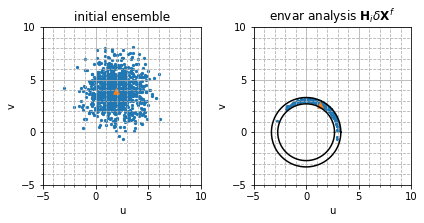

In [12]:
x = np.arange(-5,11)
fig, ax = plt.subplots(1,2)
ax[0].scatter(xf[0,:], xf[1,:], s=5)
ax[0].scatter(xf_[0], xf_[1], s=30, marker='^')
ax[0].set_xlabel("u")
ax[0].set_ylabel("v")
ax[0].set_aspect("equal")
ax[0].set_xticks(x[::5])
ax[0].set_yticks(x[::5])
ax[0].set_xticks(x, minor=True)
ax[0].set_yticks(x, minor=True)
ax[0].grid(which="major")
ax[0].grid(which="minor", linestyle="dashed")
ax[0].set_title("initial ensemble")

ax[1].scatter(xa[0,:], xa[1,:], s=5)
ax[1].scatter(xa_[0], xa_[1], s=30, marker='^')
ax[1].plot(xmin, ymin, color="black")
ax[1].plot(xmax, ymax, color="black")
ax[1].set_xlabel("u")
ax[1].set_ylabel("v")
ax[1].set_aspect("equal")
ax[1].set_xticks(x[::5])
ax[1].set_yticks(x[::5])
ax[1].set_xticks(x, minor=True)
ax[1].set_yticks(x, minor=True)
ax[1].grid(which="major")
ax[1].grid(which="minor", linestyle="dashed")
ax[1].set_title(r"envar analysis $\mathbf{H}_i \delta \mathbf{X}^f$")
fig.tight_layout()
fig.savefig("envar_speed.png")
plt.show()